Cross-Validation: is a step in the process of building a ML models which helps us ensure that our models fit the data accurately and also ensures that we donot overfit.

In [1]:
#We import the library of pandas ( remember pandas is like Excel, but after having taken some sort of illegal steroids)
import pandas as pd

#Someone previously uploaded our data to this link
data_url = ("https://raw.githubusercontent.com/sharmaroshan/Wine-Quality-Predictions/master/winequality-red.csv")

#We load our data from that link to Pandas 
df = pd.read_csv(data_url)

#We print out the first 10 rows of our data to visualize what we are working with here
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [2]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [3]:
# a mapping dictionary that maps the quality values from 0 to 5
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5
}
#you can use the map function of pandas with any dictionary to convert the values in a given column to values in the dictionary
df.loc[:,"quality"] = df.quality.map(quality_mapping)

In [4]:
#use sample with frac=1 to shuffle the dataframe. we reset the indices since they change after shuffling the dataframe
df = df.sample(frac=1).reset_index(drop=True)

#top 1000 rows are selected for training
df_train = df.head(1000)

#bottom 599 values are selected for testing/validation
df_test = df.tail(599)

**Decision Tree**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


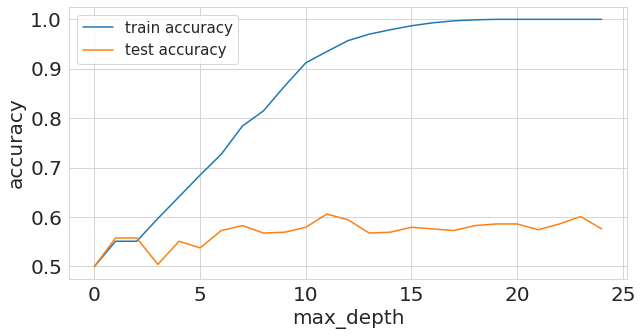

In [5]:
#import form sklearn
from sklearn import tree
from sklearn import metrics

#import matplotlib and seaborn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#this is our global size of label text on the plots
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick',labelsize=20)

#This line ensures that the plot is displayed inside the notebook
%matplotlib inline

#initialize lists to store accuracies for training and test data 
#we start with 50% accuracy
train_accuracies = [0.5]
test_accuracies = [0.5]

#iterate over a few depth values
for depth in range(1,25):
  #init the model
  clf = tree.DecisionTreeClassifier(max_depth=depth)

  #columns/features for training
  #note that, this can be done outside the loop
  #choose the columns you want to train on these are the features for the model
  cols = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

  #fit the model on given feature
  #train the model on the provided features and mapped quality from before
  clf.fit(df_train[cols],df_train.quality)

  #generate predictions on the training set
  train_predictions = clf.predict(df_train[cols])

  #generate predictions on the test set
  test_predictions = clf.predict(df_test[cols])

  #calculate the accuracy of predictions on training data set
  train_accuracy = metrics.accuracy_score(
      df_train.quality,train_predictions
  )

  #calculate the accuracy of predictions on test dataset
  test_accuracy = metrics.accuracy_score(
      df_test.quality,test_predictions
  )

  #append accuracies
  train_accuracies.append(train_accuracy)
  test_accuracies.append(test_accuracy)

#create two plots using matplotlib and seaborn
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
plt.plot(train_accuracies,label="train accuracy")
plt.plot(test_accuracies,label="test accuracy")
plt.legend(loc="upper left",prop = {'size':15})
plt.xticks(range(0,26,5))
plt.xlabel("max_depth", size=20)
plt.ylabel("accuracy",size=20)
plt.show()

The above plot clearly depicts **Overfitting**.